# Microdados da Educação Superior com ênfase nos alunos cotistas e não cotistas:
- ALUNOS EM PUBLICAS X PRIVADAS
- ALUNOS COTISTAS DAS IES DO BRASIL
- ALUNOS COTISTAS DAS IES PÚBLICAS BRASIL
- ALUNOS COTISTAS DAS IES PÚBLICAS DE PERNAMBUCO (Inserir código)
- COTAS X RAÇA (EM TODAS AS IES)
- COTISTAS X ESCOLA ENSINO MEDIO

##### A Lei de Cotas

Publicada em 29 de agosto de 2012, a Lei de Cotas (Lei Nº 12.711) decreta que todas as instituições federais de ensino superior devem reservar, no mínimo, 50% das vagas de cada curso técnico e de graduação aos estudantes de escolas públicas. No caso dos cursos técnicos, tem que ter estudado todo o ensino fundamental na rede pública. Para os cursos superiores, o ensino médio.

Dentro desta porcentagem, metade das vagas deve ser destinada aos estudantes de famílias com renda mensal igual ou menor que 1,5 salário mínimo per capita (por/para cada indivíduo).

Em cada faixa de renda, entre os candidatos cotistas, são separadas vagas para autodeclarados pretos, pardos e indígenas e pessoas com deficiência, proporcionalmente ao censo do Instituto Brasileiro de Geografia e Estatística (IBGE) no estado da instituição.

##### Os programas de reserva de vagas incluem:
- Reserva de vagas de cunho étnico
- Reserva de vagas para pessoas com deficiência
- Reserva de vagas para pessoas oriundas de escolas públicas
- Reserva de vagas para pessoas de baixa renda
- Outras situações

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns


dataframe = pd.read_csv(
    'SUP_ALUNO_2019.csv',
    encoding = "ISO-8859-1", 
    usecols=['CO_IES', 'IN_RESERVA_VAGAS', 'TP_SITUACAO', 'TP_COR_RACA', 
             'TP_CATEGORIA_ADMINISTRATIVA', 'IN_FINANCIAMENTO_ESTUDANTIL',
            'TP_ESCOLA_CONCLUSAO_ENS_MEDIO', 'IN_FIN_REEMB_FIES', 
             'IN_FIN_NAOREEMB_PROUNI_INTEGR', 'IN_FIN_NAOREEMB_PROUNI_PARCIAL'],
    sep='|'
    )

dataframe.head()

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_COR_RACA,TP_SITUACAO,IN_RESERVA_VAGAS,IN_FINANCIAMENTO_ESTUDANTIL,IN_FIN_REEMB_FIES,IN_FIN_NAOREEMB_PROUNI_INTEGR,IN_FIN_NAOREEMB_PROUNI_PARCIAL,TP_ESCOLA_CONCLUSAO_ENS_MEDIO
0,1,1,2,2,0,NaN,NaN,NaN,NaN,1
1,1,1,3,3,1,NaN,NaN,NaN,NaN,1
2,1,1,3,2,1,NaN,NaN,NaN,NaN,1
3,1,1,2,4,1,NaN,NaN,NaN,NaN,1
4,1,1,3,6,1,NaN,NaN,NaN,NaN,1


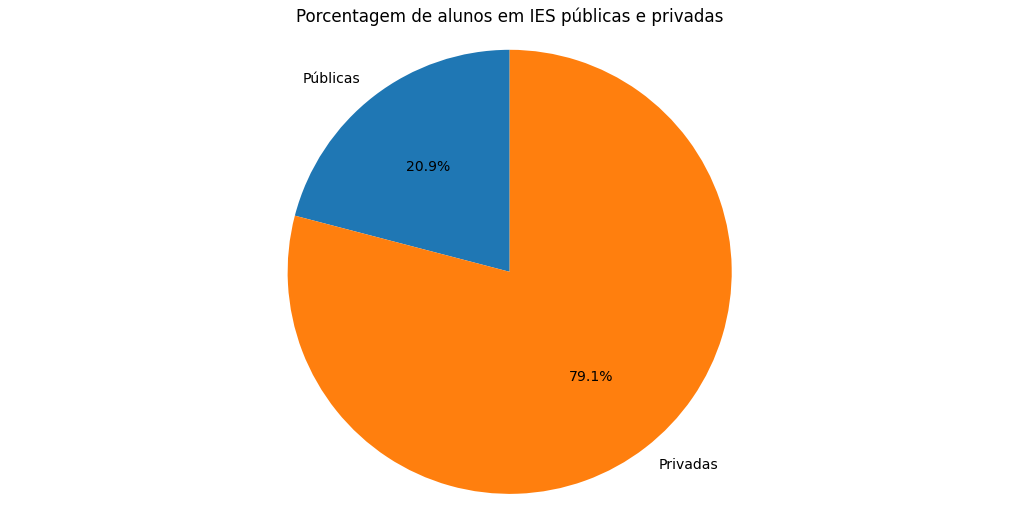

Número de alunos em IES públicas: 2584929
Número de alunos em IES privadas: 9765903


In [2]:
alunosPubFed = dataframe.loc[dataframe['TP_CATEGORIA_ADMINISTRATIVA'] == 1].count()[0]
alunosPubEst = dataframe.loc[dataframe['TP_CATEGORIA_ADMINISTRATIVA'] == 2].count()[0]
alunosPubMun = dataframe.loc[dataframe['TP_CATEGORIA_ADMINISTRATIVA'] == 3].count()[0]
alunosPrivLucr = dataframe.loc[dataframe['TP_CATEGORIA_ADMINISTRATIVA'] == 4].count()[0]
alunosPriv_N_Lucr = dataframe.loc[dataframe['TP_CATEGORIA_ADMINISTRATIVA'] == 5].count()[0]
alunosPrivEstrito = dataframe.loc[dataframe['TP_CATEGORIA_ADMINISTRATIVA'] == 6].count()[0]
alunosEsp = dataframe.loc[dataframe['TP_CATEGORIA_ADMINISTRATIVA'] == 7].count()[0]
AlunosPrivComun = dataframe.loc[dataframe['TP_CATEGORIA_ADMINISTRATIVA'] == 8].count()[0]
AlunosPrivConf = dataframe.loc[dataframe['TP_CATEGORIA_ADMINISTRATIVA'] == 9].count()[0]

totalPublicas = alunosPubFed + alunosPubEst + alunosPubMun
totalPrivadas = alunosPrivLucr + alunosPriv_N_Lucr + alunosPrivEstrito + alunosEsp + AlunosPrivComun + AlunosPrivConf

labels = ['Públicas', 'Privadas']

values = [totalPublicas, totalPrivadas]

fig1, ax1 = plt.subplots(figsize=(18, 9))

plt.rcParams.update({'font.size': 14})

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')

ax1.set_title(f"Porcentagem de alunos em IES públicas e privadas")

plt.show()

print(f'Número de alunos em IES públicas: {totalPublicas}\nNúmero de alunos em IES privadas: {totalPrivadas}')

Conforme explicitado, o número de alunos de Instituições de Ensino Superior públicas é bem inferior ao número de alunos em IES privadas.

---
## Gráfico para a visualização da porcentagem de alunos que participaram de programa de reserva de vagas (cotas) em todas as IES brasileiras (públicas e privadas).


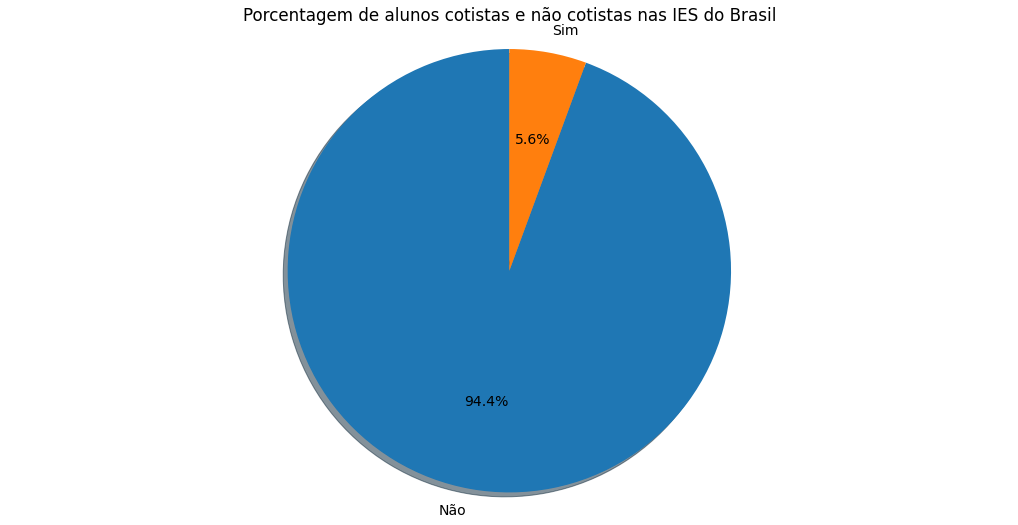

Número de alunos cotistas: 693243
Número de alunos não cotistas: 11657589


In [3]:
numeroEstudantesBrasil = dataframe.shape[0]

nao = dataframe.loc[dataframe['IN_RESERVA_VAGAS'] == 0].count()[0]
sim = dataframe.loc[dataframe['IN_RESERVA_VAGAS'] == 1].count()[0]

labels = ['Não', 'Sim']

sizes=[nao*100/numeroEstudantesBrasil, 
       sim*100/numeroEstudantesBrasil]

fig1, ax1 = plt.subplots(figsize=(18, 9))

plt.rcParams.update({'font.size': 14})

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal')

ax1.set_title(f"Porcentagem de alunos cotistas e não cotistas nas IES do Brasil")

plt.show()

print(f'Número de alunos cotistas: {sim}\nNúmero de alunos não cotistas: {nao}')

Como é possível de observar, uma enorme parte dos alunos de Instituições de Ensino Superior do Brasil (públicas e privadas) não ingressaram através de um programa de reserva de vagas. São pouquíssimos aqueles que obtiveram uma chance de ingressar em um curso superior através de cotas.

O modelo do sistema de cotas do MEC é válido para as instituições de ensino Federais e as que utilizam o Sisu para o processo seletivo. Porém, universidades estaduais e particulares podem adotar métodos próprios.

No próximo gráfico é dado um foco maior nas IES públicas, onde a oferta desse tipo de programa de vagas é maior.

## Gráfico para a visualização da porcentagem de alunos que participaram de programa de reserva de vagas (cotas) nas IES públicas do Brasil.

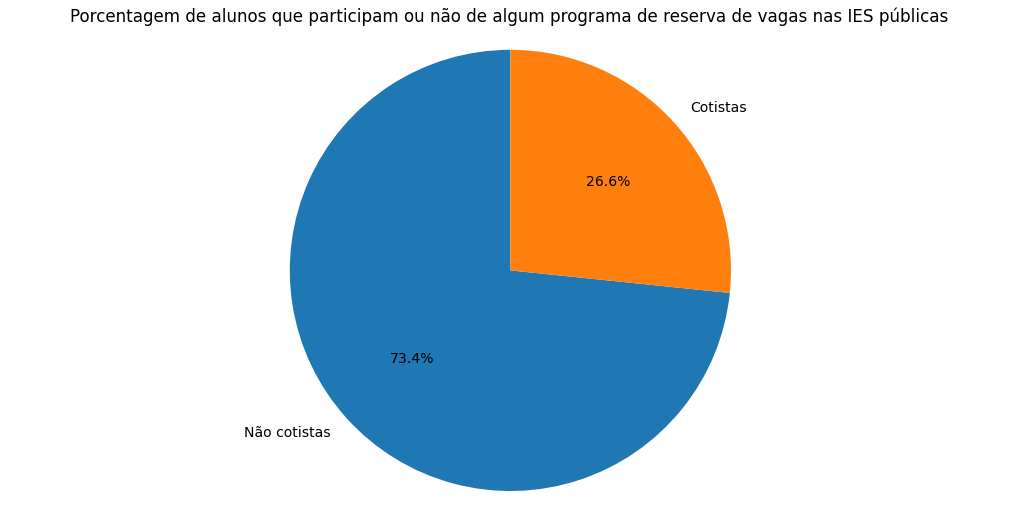

Número de alunos cotistas: 688384
Número de alunos não cotistas: 1896545


In [4]:
alunosFed = dataframe.loc[dataframe['TP_CATEGORIA_ADMINISTRATIVA'] == 1]
alunosEst = dataframe.loc[dataframe['TP_CATEGORIA_ADMINISTRATIVA'] == 2]
alunosMun = dataframe.loc[dataframe['TP_CATEGORIA_ADMINISTRATIVA'] == 3]

naoCotistasFed = alunosFed.loc[alunosFed['IN_RESERVA_VAGAS'] == 0].count()[0]
cotistasFed = alunosFed.loc[alunosFed['IN_RESERVA_VAGAS'] == 1].count()[0]
naoCotistasEst = alunosEst.loc[alunosEst['IN_RESERVA_VAGAS'] == 0].count()[0]
cotistasEst = alunosEst.loc[alunosEst['IN_RESERVA_VAGAS'] == 1].count()[0]
naoCotistasMun = alunosMun.loc[alunosMun['IN_RESERVA_VAGAS'] == 0].count()[0]
cotistasMun = alunosMun.loc[alunosMun['IN_RESERVA_VAGAS'] == 1].count()[0]

cotistasTotal = cotistasFed + cotistasEst + cotistasMun
naoCotistasTotal = naoCotistasFed + naoCotistasEst + naoCotistasMun

labels = ['Não cotistas', 'Cotistas']

values = [naoCotistasTotal, cotistasTotal]

fig1, ax1 = plt.subplots(figsize=(18, 9))

plt.rcParams.update({'font.size': 14})

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')

ax1.set_title(f"Porcentagem de alunos que participam ou não de algum programa de reserva de vagas nas IES públicas")

plt.show()

print(f'Número de alunos cotistas: {cotistasTotal}\nNúmero de alunos não cotistas: {naoCotistasTotal}')

Conforme mostrado, mesmo em IES públicas - que obrigatoriamente dispõem de programas de reserva de vagas - a porcentagem de alunos que usufruíram do sistema de cotas é baixa. Na próxima análise é dado foco nas IES públicas de Pernambuco (escolhe-se um código para análise).

---
## Gráfico para a visualização da porcentagem de alunos de uma IES pública Pernambucana que participaram de programa de reserva de vagas.

In [5]:
listaIES = {580 : 'UFPE', 
            409 : 'UPE', 
            587 : 'UFRPE', 
           1809 : 'IFPE',
           3984 : 'UNIVASF'}

#### Código da Instituição de Ensino Superior:

In [6]:
codigoIES = 580
nomeIES = listaIES[codigoIES]

In [7]:
numeroEstudantesIES = dataframe.loc[dataframe['CO_IES'] == codigoIES].count()[0]
print(f"Quantidade de alunos da {nomeIES} avaliados pelo Censo: {numeroEstudantesIES} estudantes.")

Quantidade de alunos da UFPE avaliados pelo Censo: 36748 estudantes.


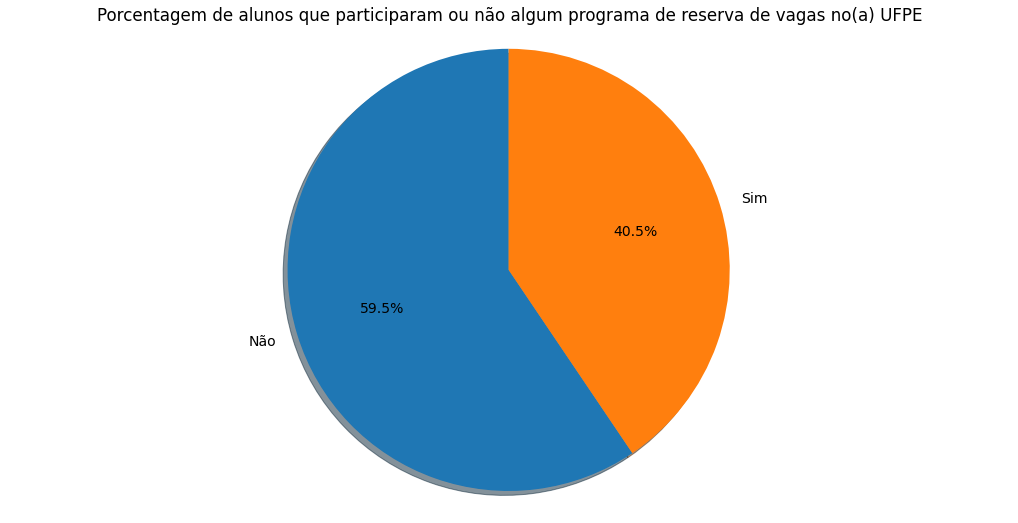

Número de alunos cotistas: 14901
Número de alunos não cotistas: 21847


In [8]:
estudantes = dataframe.loc[dataframe['CO_IES'] == codigoIES]

nao = estudantes.loc[estudantes['IN_RESERVA_VAGAS'] == 0].count()[0]
sim = estudantes.loc[estudantes['IN_RESERVA_VAGAS'] == 1].count()[0]

labels = ['Não', 'Sim']

sizes=[nao*100/numeroEstudantesIES, 
       sim*100/numeroEstudantesIES]

fig1, ax1 = plt.subplots(figsize=(18, 9))

plt.rcParams.update({'font.size': 14})

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal')

ax1.set_title(f"Porcentagem de alunos que participaram ou não algum programa de reserva de vagas no(a) {nomeIES}")

plt.show()

print(f'Número de alunos cotistas: {sim}\nNúmero de alunos não cotistas: {nao}')

---
## Gráfico para a visualização da raça/cor declarada por alunos que participam ou não de algum programa de reserva de vagas nas IES do Brasil

### Cotistas

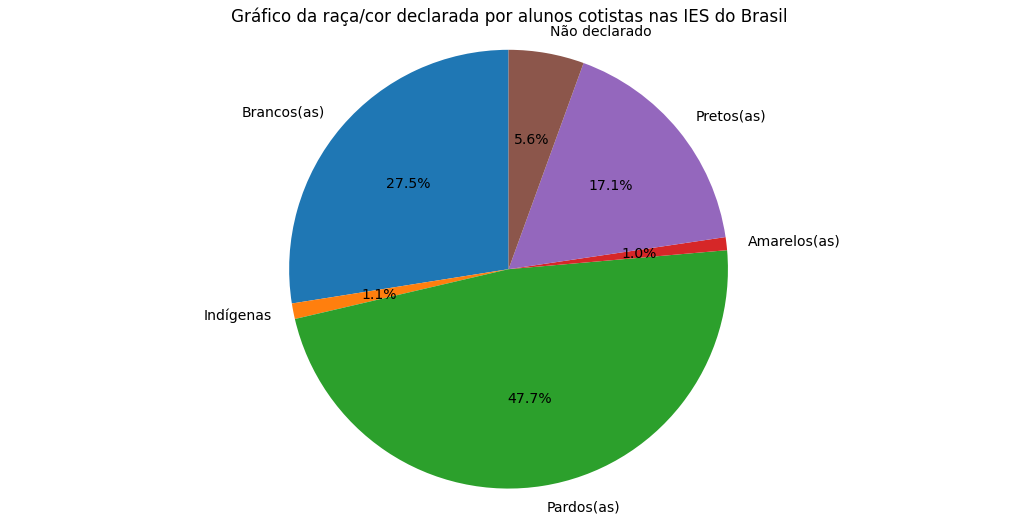

In [9]:
cotistas = dataframe.loc[dataframe['IN_RESERVA_VAGAS'] == 1]  # lista cotistas

# declaração de raça dos cotistas
naoDeclarouCot = cotistas.loc[cotistas['TP_COR_RACA'] == 0].count()[0]
brancosCot = cotistas.loc[cotistas['TP_COR_RACA'] == 1].count()[0]
pretosCot = cotistas.loc[cotistas['TP_COR_RACA'] == 2].count()[0]
pardosCot = cotistas.loc[cotistas['TP_COR_RACA'] == 3].count()[0]
amarelosCot = cotistas.loc[cotistas['TP_COR_RACA'] == 4].count()[0]
indigenasCot = cotistas.loc[cotistas['TP_COR_RACA'] == 5].count()[0]
naoDispoeCot = cotistas.loc[cotistas['TP_COR_RACA'] == 9].count()[0]
naoInformadoCot = naoDeclarouCot + naoDispoeCot

labels = ['Brancos(as)', 'Indígenas', 'Pardos(as)', 'Amarelos(as)', 'Pretos(as)', 'Não declarado']

values = [brancosCot,
         indigenasCot,
         pardosCot,
         amarelosCot,
         pretosCot,
         naoInformadoCot]

fig1, ax1 = plt.subplots(figsize=(18, 9))

plt.rcParams.update({'font.size': 14})

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')

ax1.set_title(f"Gráfico da raça/cor declarada por alunos cotistas nas IES do Brasil")

plt.show()

# plt.bar(eixoX, eixoY, width=.8)

# plt.show()

### Não cotistas

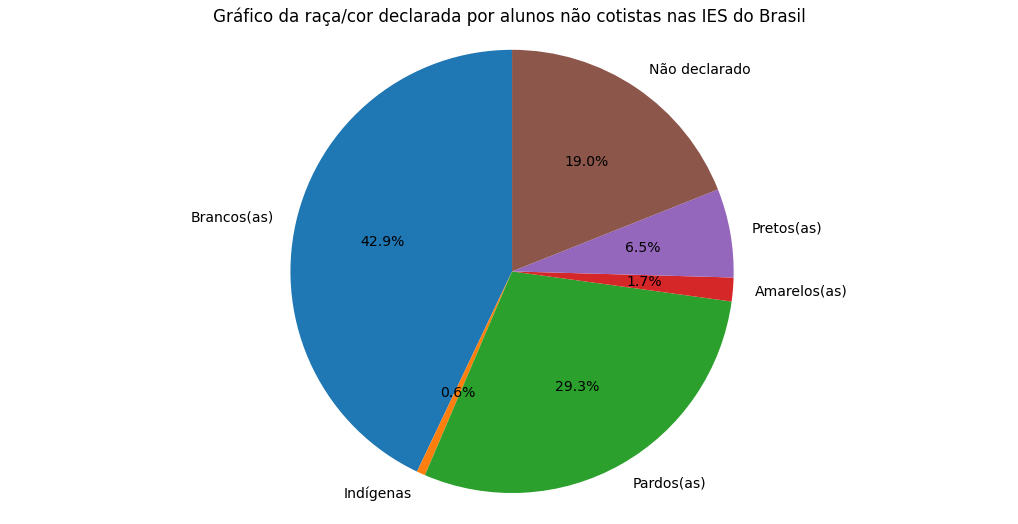

In [10]:
naoCotistas = dataframe.loc[dataframe['IN_RESERVA_VAGAS'] == 0]  # lista não cotistas

# declaração de raça dos nao cotistas
naoDeclarouNCot = naoCotistas.loc[naoCotistas['TP_COR_RACA'] == 0].count()[0]
brancosNCot = naoCotistas.loc[naoCotistas['TP_COR_RACA'] == 1].count()[0]
pretosNCot = naoCotistas.loc[naoCotistas['TP_COR_RACA'] == 2].count()[0]
pardosNCot = naoCotistas.loc[naoCotistas['TP_COR_RACA'] == 3].count()[0]
amarelosNCot = naoCotistas.loc[naoCotistas['TP_COR_RACA'] == 4].count()[0]
indigenasNCot = naoCotistas.loc[naoCotistas['TP_COR_RACA'] == 5].count()[0]
naoDispoeNCot = naoCotistas.loc[naoCotistas['TP_COR_RACA'] == 9].count()[0]
naoInformadoNCot = naoDeclarouNCot + naoDispoeNCot

labels = ['Brancos(as)', 'Indígenas', 'Pardos(as)', 'Amarelos(as)', 'Pretos(as)', 'Não declarado']

values = [brancosNCot,
         indigenasNCot,
         pardosNCot,
         amarelosNCot,
         pretosNCot,
         naoInformadoNCot]

fig1, ax1 = plt.subplots(figsize=(18, 9))

plt.rcParams.update({'font.size': 14})

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')

ax1.set_title(f"Gráfico da raça/cor declarada por alunos não cotistas nas IES do Brasil")

plt.show()

É notável a diferença entre as raças/cores declaradas entre alunos cotistas e não cotistas. A porcentagem de pretos e pardos que ingressaram pelo sistema de cotas é maior.

De acordo com dados da Pesquisa Nacional por Amostra de Domicílios (PNAD) 2019, 42,7% dos brasileiros se declararam como brancos, 46,8% como pardos, 9,4% como pretos e 1,1% como amarelos ou indígenas. (Fonte: https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18319-cor-ou-raca.html#:~:text=De%20acordo%20com%20dados%20da,1%25%20como%20amarelos%20ou%20ind%C3%ADgenas.)

Com isso, é possível concluir que o sistema de cotas brasileiro permitiu uma maior inserção de pessoas não brancas nas Instituições de Ensino Superior públicas; pessoas essas que são, em boa parte, menos afortunadas socialmente  e economicamente (Figura abaixo). Isso permite uma maior oportunidade para aqueles em situação de vulnerabilidade socioeconômica e ajuda a diminuir em parte a grande desigualdade social que tange a nação brasileira.

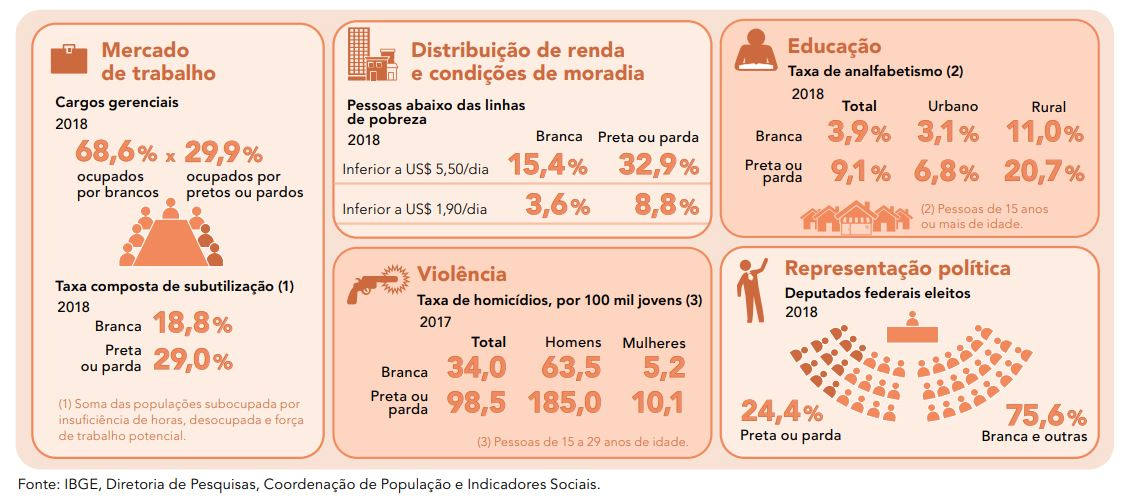

## COTAS X ENSINO MEDIO

### Cotistas

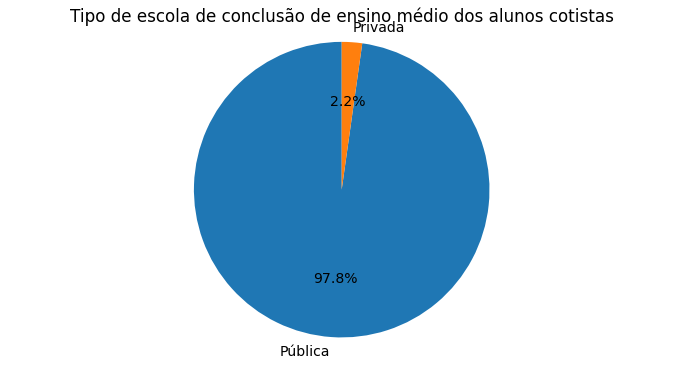

In [11]:
cotistas = dataframe.loc[dataframe['IN_RESERVA_VAGAS'] == 1]

escolaPublica = cotistas.loc[cotistas['TP_ESCOLA_CONCLUSAO_ENS_MEDIO'] == 1].count()[0]
escolaPrivada = cotistas.loc[cotistas['TP_ESCOLA_CONCLUSAO_ENS_MEDIO'] == 2].count()[0]
# naoInformado = cotistas.loc[cotistas['TP_ESCOLA_CONCLUSAO_ENS_MEDIO'] == 9].count()[0]  # < 0.5 %

labels = ['Pública', 'Privada']

values = [escolaPublica,
         escolaPrivada]

fig1, ax1 = plt.subplots(figsize=(12, 6))

plt.rcParams.update({'font.size': 14})

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')

ax1.set_title(f"Tipo de escola de conclusão de ensino médio dos alunos cotistas")

plt.show()

Esse resultado é muito expressivo. Mostra como o sistema de cotas, seja ele de qualquer critério, permite ao estudante de escola pública acesso a uma universidade principalmente pública, que são as que reservam mais vagas desse tipo.

### Não cotistas

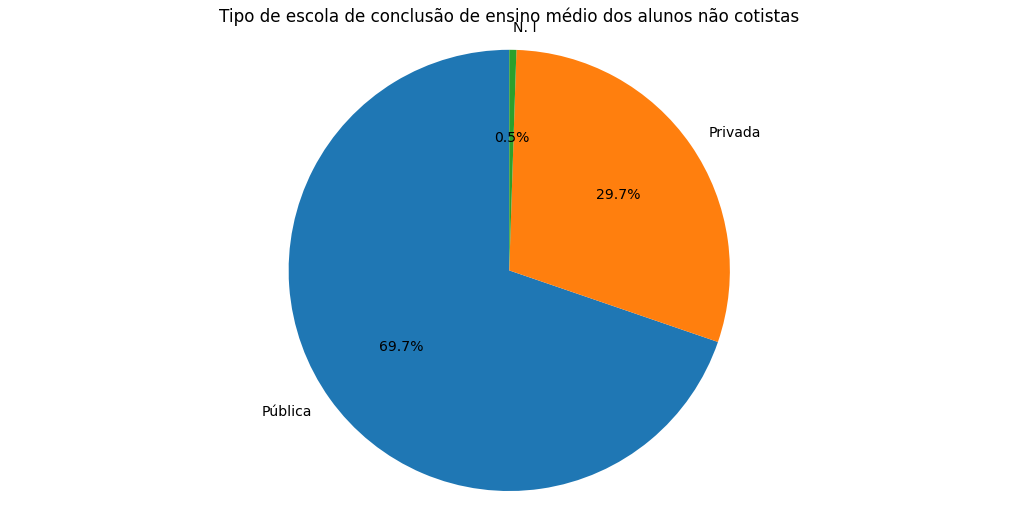

In [12]:
naoCotistas = dataframe.loc[dataframe['IN_RESERVA_VAGAS'] == 0]

escolaPublica = naoCotistas.loc[naoCotistas['TP_ESCOLA_CONCLUSAO_ENS_MEDIO'] == 1].count()[0]
escolaPrivada = naoCotistas.loc[naoCotistas['TP_ESCOLA_CONCLUSAO_ENS_MEDIO'] == 2].count()[0]
naoInformado = naoCotistas.loc[naoCotistas['TP_ESCOLA_CONCLUSAO_ENS_MEDIO'] == 9].count()[0]

labels = ['Pública', 'Privada', 'N. I']

values = [escolaPublica,
          escolaPrivada,
          naoInformado]

fig1, ax1 = plt.subplots(figsize=(18, 9))

plt.rcParams.update({'font.size': 14})

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')

ax1.set_title(f"Tipo de escola de conclusão de ensino médio dos alunos não cotistas")

plt.show()


Curiosamente a maioria dos alunos não cotistas em todas as IES do Brasil são oriundos de escolas públicas. Algumas hipóteses interessantes podem ser levantadas com esses dados. Seria isso consequência das poucas vagas em IES públicas, mesmo com a reserva de vagas, que não atendem a todos os aptos às cotas e, portanto, os que não conseguem ingressar passam a recorrer a instituições privadas de ensino? Teriam recorrido ao financiamento através do FIES ou com bolsas integrais e parciais pelo ProUni? Após uma pesquisa, foram encontrados os seguintes dados que dão sentido ao gráfico acima.

A Pesquisa Nacional por Amostra de Domicílios Contínua (Pnad) de 2019, divulgada pelo Instituto Brasileiro de Geografia e Estatística (IBGE), indica que mais de 80% dos alunos do ensino fundamental e médio estudam na rede pública em todo o país.
- 74,7% dos alunos da creche e pré-escola
- 82% dos estudantes do ensino fundamental regular
- 87,4% do ensino médio regular

Fonte: https://g1.globo.com/educacao/noticia/2020/07/15/escolas-da-rede-publica-atendem-mais-de-80percent-dos-alunos-do-ensino-fundamental-e-medio-aponta-ibge.ghtml

## NÃO COTISTAS x FIES\ProUni

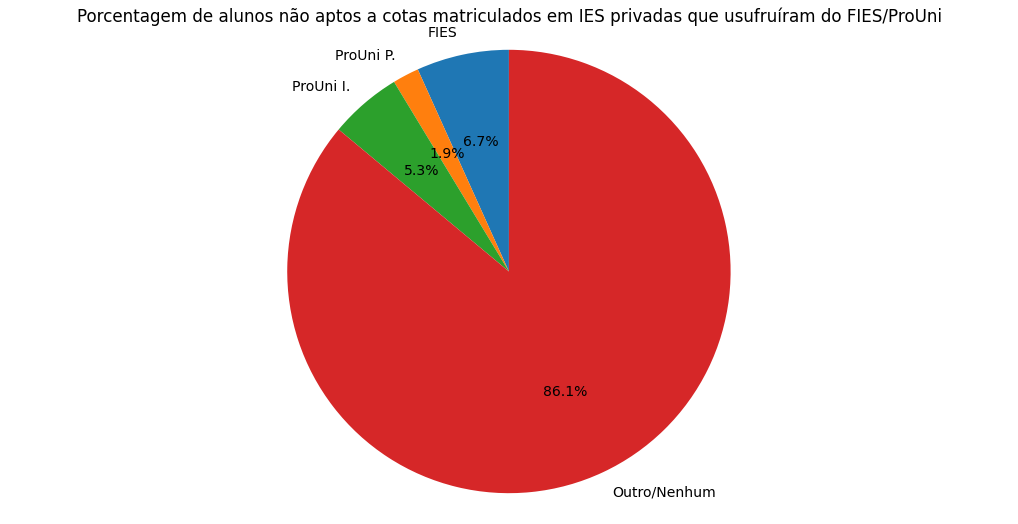

Total que utilizou de um dos financiamentos: 1360430 estudantes.
Total que não utilizou de financiamento outro tipo: 8400614 estudantes.


In [13]:
quantiaNaoCotistas = dataframe.loc[dataframe['IN_RESERVA_VAGAS'] == 0].count()[0]
naoCotistas = dataframe.loc[dataframe['IN_RESERVA_VAGAS'] == 0]

# outroFinanciamento = naoCotistas.loc[naoCotistas['IN_FIN_REEMB_FIES'] == 0].count()[0]
simFIES = naoCotistas.loc[naoCotistas['IN_FIN_REEMB_FIES'] == 1].count()[0]
# nenhumFinanciamento = naoCotistas.loc[naoCotistas['IN_FIN_REEMB_FIES'] == '.'].count()[0]

# outroFinanciamento2 = naoCotistas.loc[naoCotistas['IN_FIN_NAOREEMB_PROUNI_PARCIAL'] == 0].count()[0]
simPUP = naoCotistas.loc[naoCotistas['IN_FIN_NAOREEMB_PROUNI_PARCIAL'] == 1].count()[0]
# nenhumFinanciamento2 = naoCotistas.loc[naoCotistas['IN_FIN_NAOREEMB_PROUNI_PARCIAL'] == '.'].count()[0]

# outroFinanciamento3 = naoCotistas.loc[naoCotistas['IN_FIN_NAOREEMB_PROUNI_INTEGR'] == 0].count()[0]
simPUI = naoCotistas.loc[naoCotistas['IN_FIN_NAOREEMB_PROUNI_INTEGR'] == 1].count()[0]
# nenhumFinanciamento3 = naoCotistas.loc[naoCotistas['IN_FIN_NAOREEMB_PROUNI_INTEGR'] == '.'].count()[0]

# outroNenhum = outroFinanciamento + nenhumFinanciamento + outroFinanciamento2 + nenhumFinanciamento2 + outroFinanciamento3 + nenhumFinanciamento3
outroNenhum = quantiaNaoCotistas - simFIES - simPUP - simPUI - naoCotistasTotal  # esse último é o total em IES públicas
labels = ['FIES', 'ProUni P.', 'ProUni I.', 'Outro/Nenhum']

values = [simFIES,
          simPUP,
          simPUI,
         outroNenhum]

fig1, ax1 = plt.subplots(figsize=(18, 9))

plt.rcParams.update({'font.size': 14})

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')

ax1.set_title(f"Porcentagem de alunos não aptos a cotas matriculados em IES privadas que usufruíram do FIES/ProUni")

plt.show()

print(f'Total que utilizou de um dos financiamentos: {simFIES+simPUP+simPUI} estudantes.\n'
      f'Total que não utilizou de financiamento outro tipo: {outroNenhum} estudantes.')

Percebe-se que é ainda pequena a parcela de estudantes que conseguem uma vaga em IES privadas através do FIES ou ProUni.

---
Portanto, dado que a maior parte dos estudantes de ensino médio do Brasil são oriundos de escolas públicas, essa parcela se torna expressiva nas universidades privadas. Infelizmente, as universidades públicas gratuitas têm aumentado pouco o seu número de vagas para estudantes, apenas 59,1% de 2009 a 2019, conforme mostrado abaixo. Assim, ainda são poucos os alunos oriundos de escolas públicas que conseguem ingressar nas IES públicas.

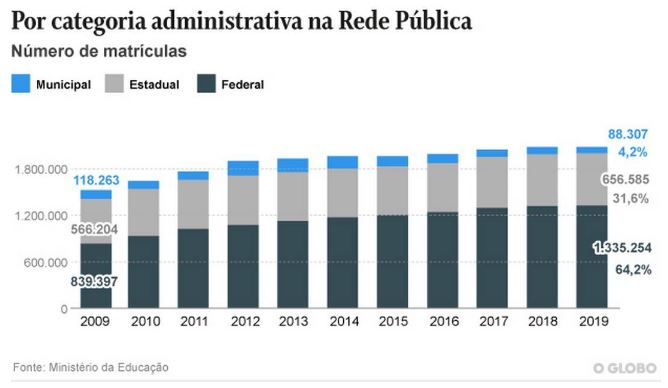